# 1. Install and Import Dependecies 

In [1]:
# !conda install paddlepaddle==2.3.0 --channel https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/Paddle/ 

In [2]:
# !pip install "paddleocr>=2.0.1"

In [3]:
# !git clone https://github.com/PaddlePaddle/PaddleOCR

In [4]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import os

# 2. Instantiate Model and Detect

In [5]:
# Setup model
ocr_model = PaddleOCR(use_angle_cls=True, lang='en',use_gpu=False, det_limit_side_len=3456)

Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/hammdoon/.paddleocr/2.4/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=3456, det_limit_type='max', det_model_dir='/home/hammdoon/.paddleocr/2.4/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_va

In [6]:
img_path = os.path.join('./images', 'drug_yt3.jpg')

In [7]:
img_path

'./images/drug_yt3.jpg'

In [8]:
# run the ocr method on the ocr_model

result = ocr_model.ocr(img_path, cls=True)

DEBUG 2022-07-15 17:17:01,306 predict_system.py:70] dt_boxes num : 21, elapse : 1.9911978244781494


[2022/07/15 17:17:01] root DEBUG: dt_boxes num : 21, elapse : 1.9911978244781494


DEBUG 2022-07-15 17:17:01,887 predict_system.py:85] cls num  : 21, elapse : 0.5701901912689209


[2022/07/15 17:17:01] root DEBUG: cls num  : 21, elapse : 0.5701901912689209


DEBUG 2022-07-15 17:17:02,563 predict_system.py:89] rec_res num  : 21, elapse : 0.6700754165649414


[2022/07/15 17:17:02] root DEBUG: rec_res num  : 21, elapse : 0.6700754165649414


In [9]:
result

[[[[20.0, 319.0], [117.0, 259.0], [136.0, 290.0], [39.0, 350.0]],
  ('alamy', 0.9848676)],
 [[[530.0, 335.0], [753.0, 198.0], [776.0, 237.0], [554.0, 374.0]],
  ('Pharmacy', 0.99809384)],
 [[[466.0, 355.0], [547.0, 355.0], [547.0, 418.0], [466.0, 418.0]],
  ('B L', 0.86886317)],
 [[[1107.0, 422.0], [1120.0, 422.0], [1120.0, 440.0], [1107.0, 440.0]],
  ('a', 0.7523901)],
 [[[374.0, 550.0], [387.0, 550.0], [387.0, 571.0], [374.0, 571.0]],
  ('CO', 0.8213774)],
 [[[500.0, 553.0], [546.0, 563.0], [540.0, 591.0], [494.0, 581.0]],
  ('YSSl', 0.5612105)],
 [[[631.0, 638.0], [729.0, 572.0], [757.0, 614.0], [659.0, 680.0]],
  ('DAYS', 0.94206583)],
 [[[518.0, 682.0], [532.0, 682.0], [532.0, 697.0], [518.0, 697.0]],
  ('a', 0.9524115)],
 [[[611.0, 698.0], [642.0, 701.0], [640.0, 726.0], [609.0, 723.0]],
  ('10', 0.57813966)],
 [[[684.0, 693.0], [790.0, 627.0], [814.0, 667.0], [708.0, 733.0]],
  ('QTY:20', 0.984078)],
 [[[851.0, 708.0], [966.0, 629.0], [987.0, 661.0], [872.0, 740.0]],
  ('12-01-2

In [10]:
type(result)

list

In [11]:
result[0]

[[[20.0, 319.0], [117.0, 259.0], [136.0, 290.0], [39.0, 350.0]],
 ('alamy', 0.9848676)]

In [12]:
result[0][0] # box cordinates
# type(result[0][0])

[[20.0, 319.0], [117.0, 259.0], [136.0, 290.0], [39.0, 350.0]]

In [13]:
result[0][1]
# type(result[0][1])

('alamy', 0.9848676)

In [14]:
result[0][1][0]

'alamy'

In [15]:
for res in result:
    print(res[1][0])

alamy
Pharmacy
B L
a
CO
YSSl
DAYS
a
10
QTY:20
12-01-2016
NO
Filled:
Date
a alamy stock photo
HDE30E
www.alamy.com


In [16]:
[res[1][0] for res in result]

['alamy',
 'Pharmacy',
 'B L',
 'a',
 'CO',
 'YSSl',
 'DAYS',
 'a',
 '10',
 'QTY:20',
 '12-01-2016',
 'NO',
 'Filled:',
 'Date',
 'a alamy stock photo',
 'HDE30E',
 'www.alamy.com']

# 3. Visualize Results

In [17]:
# Extracting detected components
boxes = [res[0] for res in result]
text = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [18]:
boxes

[[[20.0, 319.0], [117.0, 259.0], [136.0, 290.0], [39.0, 350.0]],
 [[530.0, 335.0], [753.0, 198.0], [776.0, 237.0], [554.0, 374.0]],
 [[466.0, 355.0], [547.0, 355.0], [547.0, 418.0], [466.0, 418.0]],
 [[1107.0, 422.0], [1120.0, 422.0], [1120.0, 440.0], [1107.0, 440.0]],
 [[374.0, 550.0], [387.0, 550.0], [387.0, 571.0], [374.0, 571.0]],
 [[500.0, 553.0], [546.0, 563.0], [540.0, 591.0], [494.0, 581.0]],
 [[631.0, 638.0], [729.0, 572.0], [757.0, 614.0], [659.0, 680.0]],
 [[518.0, 682.0], [532.0, 682.0], [532.0, 697.0], [518.0, 697.0]],
 [[611.0, 698.0], [642.0, 701.0], [640.0, 726.0], [609.0, 723.0]],
 [[684.0, 693.0], [790.0, 627.0], [814.0, 667.0], [708.0, 733.0]],
 [[851.0, 708.0], [966.0, 629.0], [987.0, 661.0], [872.0, 740.0]],
 [[723.0, 737.0], [764.0, 731.0], [767.0, 754.0], [727.0, 760.0]],
 [[795.0, 753.0], [860.0, 717.0], [873.0, 742.0], [809.0, 778.0]],
 [[756.0, 787.0], [794.0, 770.0], [803.0, 789.0], [765.0, 806.0]],
 [[46.0, 884.0], [510.0, 886.0], [510.0, 941.0], [46.0, 939.

In [19]:
text

['alamy',
 'Pharmacy',
 'B L',
 'a',
 'CO',
 'YSSl',
 'DAYS',
 'a',
 '10',
 'QTY:20',
 '12-01-2016',
 'NO',
 'Filled:',
 'Date',
 'a alamy stock photo',
 'HDE30E',
 'www.alamy.com']

In [20]:
scores

[0.9848676,
 0.99809384,
 0.86886317,
 0.7523901,
 0.8213774,
 0.5612105,
 0.94206583,
 0.9524115,
 0.57813966,
 0.984078,
 0.986214,
 0.7366667,
 0.97065467,
 0.9939067,
 0.96382946,
 0.99897796,
 0.9790316]

In [21]:
# Specifing font path for draw_ocr
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [22]:
font_path

'PaddleOCR/doc/fonts/latin.ttf'

In [23]:
# Import imgaes and reorder the color channels
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

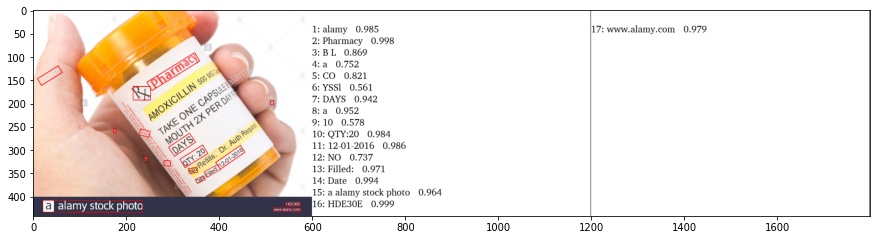

In [24]:
# Visualize our image and detections

# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, text, scores, font_path=font_path)

# show the image using matplotlib
plt.imshow(annotated)

In [25]:
img.shape

(957, 1300, 3)